# Data Visualization

Purpose of this file is to explore the LIDC-IDRI dataset using data visuallization methods, such as box plots and histograms

In [2]:
import os
import pydicom
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

data_path = 'C:/Users/darte/Documents/Projects/lung-cancer-detection/Data/LIDC-IDRI'
print(data_path)

def load_dicom_images(img_path):
    dicom_images = []

    for root, _, files in os.walk(img_path):
        for file in files:
            if file.endswith('.dcm'):
                dicom_path = os.path.join(root, file)
                dicom_data = pydicom.dcmread(dicom_path)
                dicom_images.append(dicom_data.pixel_array)

    print(f"Loaded {len(dicom_images)} DICOM images")
    return dicom_images

images = load_dicom_images(data_path)

C:/Users/darte/Documents/Projects/lung-cancer-detection/Data/LIDC-IDRI
Loaded 3592 DICOM images


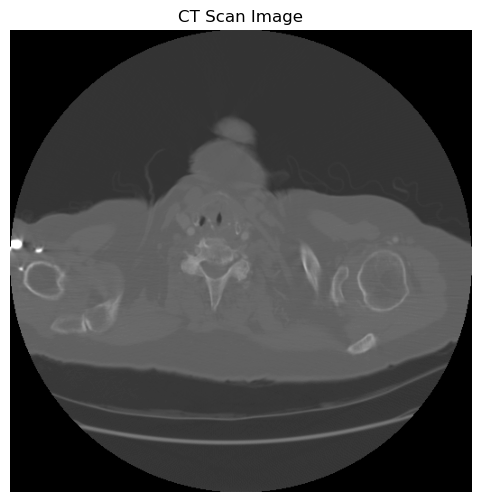

In [20]:
%matplotlib inline
def display_sample(image):
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap='gray')
    plt.title("CT Scan Image")
    plt.axis('off')
    plt.show()

display_sample(images[0])

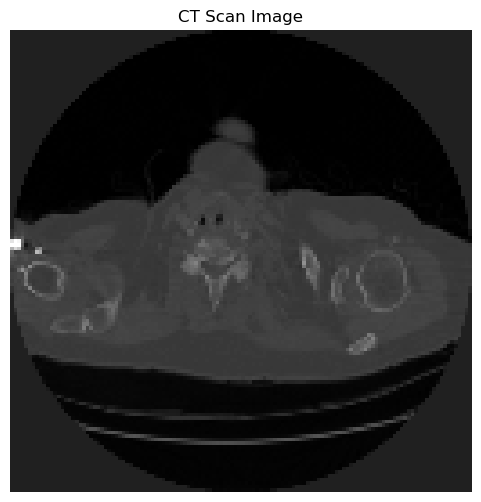

In [35]:
def preprocess_image(image, size=(128,128)):
    border_value = image[0, 0]  # Assuming the border value is the same as the top-left corner value
    
    # Mask out regions with the identified border value
    masked_image = np.where(image == border_value, np.nan, image)
    
    # Replace NaN values with the mean of the non-NaN values
    mean_value = np.nanmean(masked_image)
    masked_image = np.where(np.isnan(masked_image), mean_value, masked_image)
    
    # Resize the image
    resized_image = cv2.resize(masked_image, size, interpolation=cv2.INTER_LINEAR)
    
    # Normalize the image
    normalized_image = resized_image / np.max(resized_image)
    
    return normalized_image

preprocessed_images = [preprocess_image(image) for image in images]
display_sample(preprocessed_images[0])

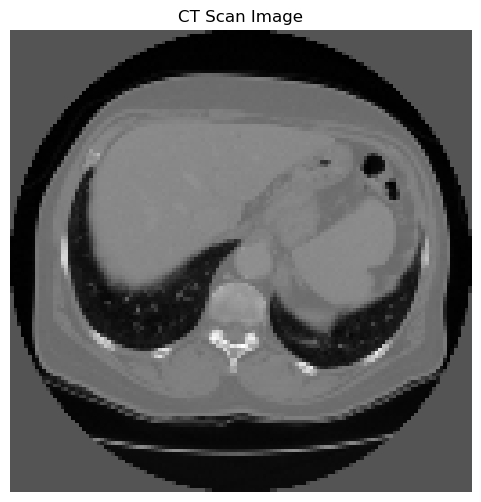

In [37]:
display_sample(preprocessed_images[1000])

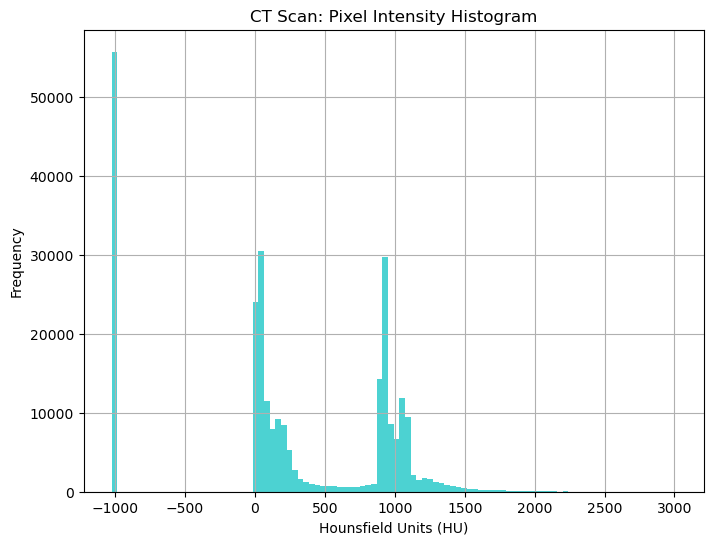

In [48]:
def plot_histogram(image):
    masked_image = image[image > -1500]

    plt.figure(figsize=(8,6))
    plt.hist(masked_image, bins=100, color='c',alpha=0.7)
    plt.title('CT Scan: Pixel Intensity Histogram')
    plt.xlabel("Hounsfield Units (HU)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

plot_histogram(images[1234])

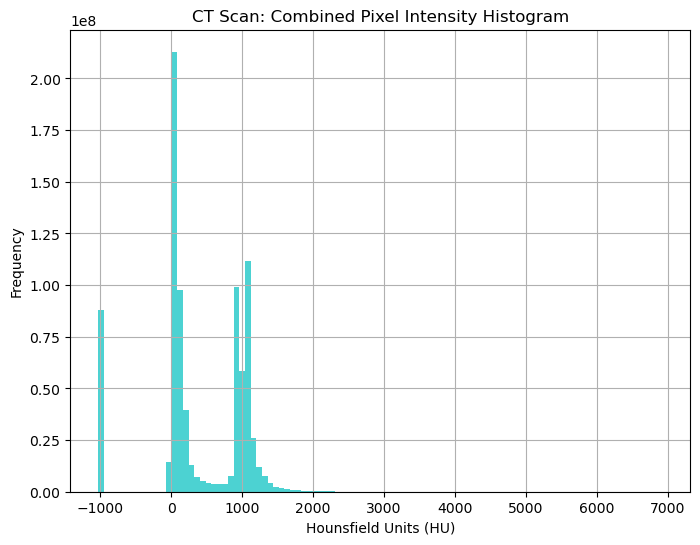

In [ ]:
def combine_pixel_values(images):
    combined_pixel_values = []

    for image in images:
        masked_image = image[image > -1500]  # Mask values below -1500 HU to handle bordering
        combined_pixel_values.extend(masked_image.flatten())

    combined_pixel_values = np.array(combined_pixel_values)
    return combined_pixel_values

combined_pixel_values = combine_pixel_values(images)

def plot_combined_histogram(pixel_values):
    plt.figure(figsize=(8,6))
    plt.hist(pixel_values, bins=100, color='c', alpha=0.7)
    plt.title('CT Scan: Combined Pixel Intensity Histogram')
    plt.xlabel("Hounsfield Units (HU)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

plot_combined_histogram(combined_pixel_values)

In [8]:
def combine_pixel_values(images):
    combined_pixel_values = []

    for image in images:
        masked_image = image[image > -1500]  # Mask values below -1500 HU to handle bordering
        combined_pixel_values.extend(masked_image.flatten())

    combined_pixel_values = np.array(combined_pixel_values)
    return combined_pixel_values

combined_pixel_values = combine_pixel_values(images)


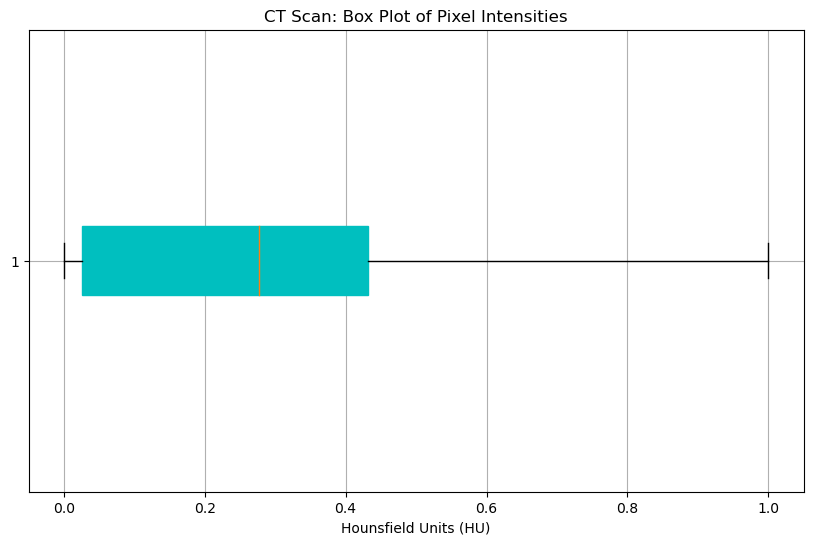

In [ ]:
def preprocess_and_normalize_image(image):
    masked_image = image[image > -1500]  
    normalized_image = (masked_image - np.min(masked_image)) / (np.max(masked_image) - np.min(masked_image)) 
    return normalized_image

def combine_pixel_values2(images):
    combined_pixel_values = []

    for image in images:
        normalized_image = preprocess_and_normalize_image(image)
        combined_pixel_values.extend(normalized_image.flatten())

    combined_pixel_values = np.array(combined_pixel_values)
    return combined_pixel_values

combined_pixel_values2 = combine_pixel_values2(images)

def plot_box_plot(pixel_values):
    plt.figure(figsize=(10, 6))
    plt.boxplot(pixel_values, vert=False, patch_artist=True, boxprops=dict(facecolor='c', color='c'))
    plt.title('CT Scan: Box Plot of Pixel Intensities')
    plt.xlabel("Hounsfield Units (HU)")
    plt.grid(True)
    plt.show()

plot_box_plot(combined_pixel_values2)

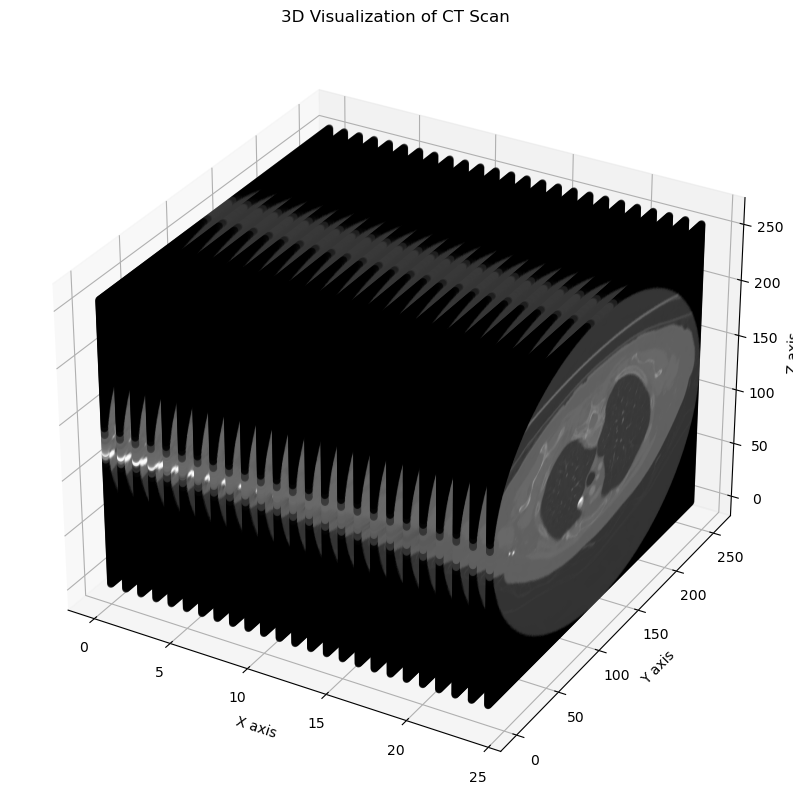

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from skimage.transform import resize

def downsample_image(image, scale_factor=0.5):
    return resize(image, (int(image.shape[0] * scale_factor), int(image.shape[1] * scale_factor)), anti_aliasing=True)

downsampled_images = [downsample_image(image) for image in images[:25]]  

def plot_3d(image_stack):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    z, y, x = image_stack.nonzero()
    
    ax.scatter(x, y, z, c=image_stack[z, y, x], cmap='gray', marker='o')
    
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.title('3D Visualization of CT Scan')
    plt.show()
    
sample_3d_image = np.stack(downsampled_images, axis=-1)
plot_3d(sample_3d_image)

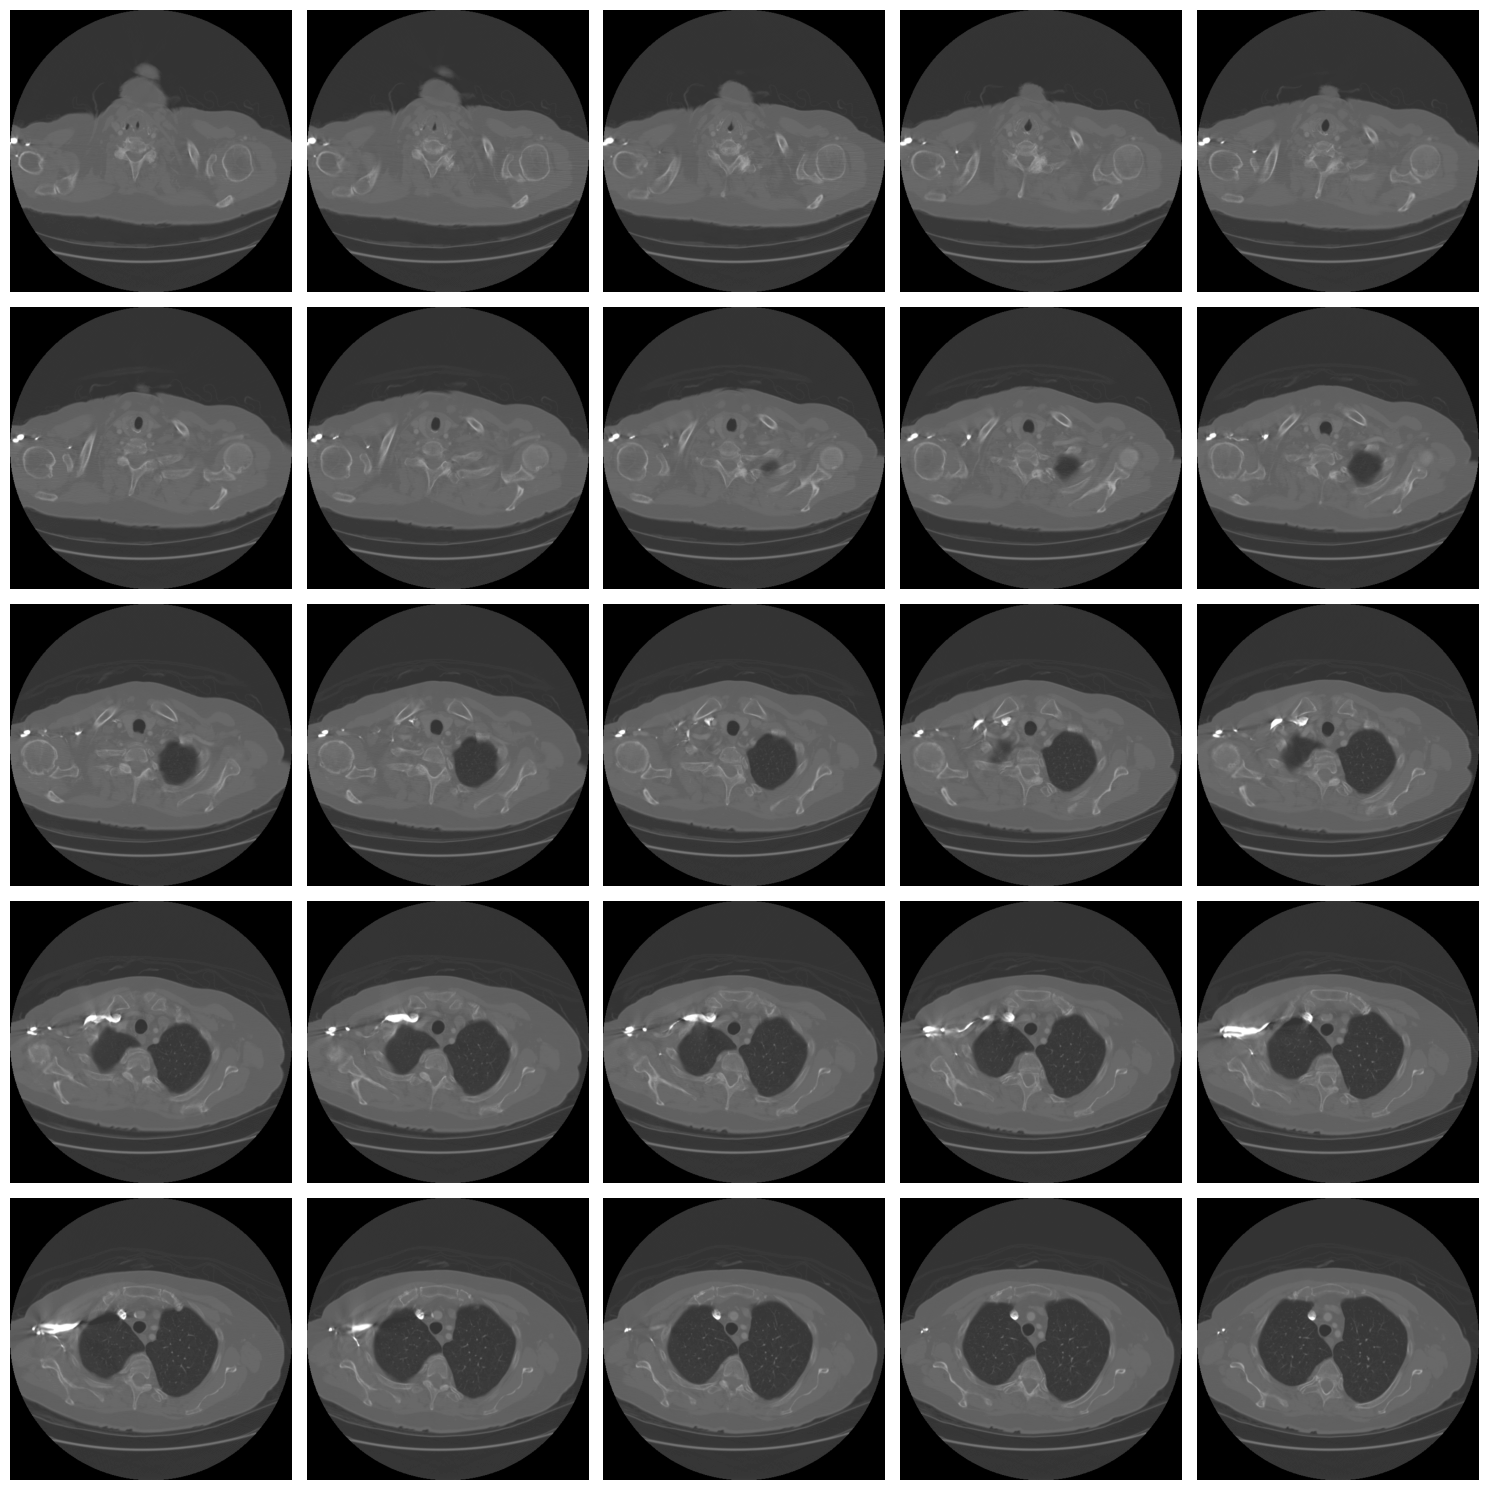

In [ ]:
import matplotlib.pyplot as plt

def display_image_grid(images, grid_size=(5, 5)):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 15))
    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        if i < len(images):
            ax.imshow(images[i], cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

display_image_grid(images[:25], grid_size=(5, 5))